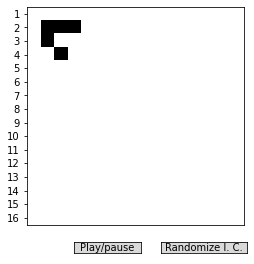

In [1]:
# coding: utf-8

"""Juego de la vida de Conway.

Autor: - Juan Luis Cano <juanlu001@gmail.com>
       - Pausa y randomizado de C.I: Pablo Navarro Martínez <pablonavaber@hotmail.com>

El tablero es un array de NumPy, donde 0 significa célula muerta y 1 célula
viva. Se muestra una animación con matplotlib.

"""

from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

import random
from matplotlib.widgets import Button

def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario


def paso(b):
    """Paso en el juego de la vida de Conway."""
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b


# Parámetros del problema
GENERACIONES = 100
N = 16 # Dimensiones del tablero (N, M)
M = N

pause = True # Pausa

def onClick(event):
    global pause
    pause ^= True

# Construimos el tablero
tablero = np.zeros((N, M), dtype = int)

# CONDICIONES INICIALES (CASILLAS ENCENDIDAS)
#   Añadimos una nave 
tablero[1, 1:4] = 1
tablero[2, 1] = 1
tablero[3, 2] = 1

def randomize(event):
    for i in range(0, N-1):
        for j in range(0, N-1):
            tablero[i, j] = random.randint(0, 1)
    global b
    b = tablero
    imagen.set_data(b)
    print(tablero)

# Creamos la figura, formateo diverso
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
# ax.axis('off')
b = tablero 
imagen = ax.imshow(b, interpolation="none", aspect = "equal", cmap=cm.gray_r)

# Major ticks
# ax.set_xticks(np.arange(0, N, 1));
ax.set_yticks(np.arange(0, N, 1));

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, N+1, 1));
ax.set_yticklabels(np.arange(1, N+1, 1));

# Minor ticks
# ax.set_xticks(np.arange(-.5, N, 1), minor=True);
# ax.set_yticks(np.arange(-.5, N, 1), minor=True);

plt.tick_params(    
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

def animate(i):
    global b

    if not pause: # Pause check
        print(i) # El parámetro de avance: la pausa no le afecta
        b = paso(b) # Iteramos la animación
        
        imagen.set_data(b)
    
    return imagen,

# Botones play/pausa, randomizar
# fig.canvas.mpl_connect('button_press_event', onClick) # Si queremos conectar el click puse a la figura entera
pause_ax = fig.add_axes((0.3, 0.025, 0.23, 0.04), anchor = 'SE')
pause_button = Button(pause_ax, 'Play/pause', hovercolor='0.975')
pause_button.on_clicked(onClick)

random_ax = fig.add_axes((0.6, 0.025, 0.3, 0.04), anchor = 'SW')
random_button = Button(random_ax, 'Randomize I. C.', hovercolor='0.975')
random_button.on_clicked(randomize)

# Animacion 
anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True, interval = 200, repeat = True)
plt.show()